In [15]:
#Necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading data
test = pd.read_csv('Data/Test.csv')
train = pd.read_csv ('Data/Train.csv')
definitions = pd.read_csv('Data/VariableDefinitions.csv')
sample =pd.read_csv('Data/SampleSubmission.csv')

In [5]:
# Variable definitions
definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [4]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [9]:
# Submission sample template
'''
The likelihood of the person having a bank account or not (Yes = 1, No = 0)
'''
sample.head(7)

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0
5,uniqueid_6 x Kenya,0
6,uniqueid_7 x Kenya,0


# Understanding the dataset

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [10]:
# Shape of the training and testing set
print('Training set shape: ', train.shape)
print('Testing set shape: ', test.shape)

Training set shape:  (23524, 13)
Testing set shape:  (10086, 12)


In [12]:
#Check for missing data
missing = train.isnull().sum()
missing

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

##### Explore the country column

In [13]:
#Check for the countries involved
train['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

<Axes: xlabel='country', ylabel='count'>

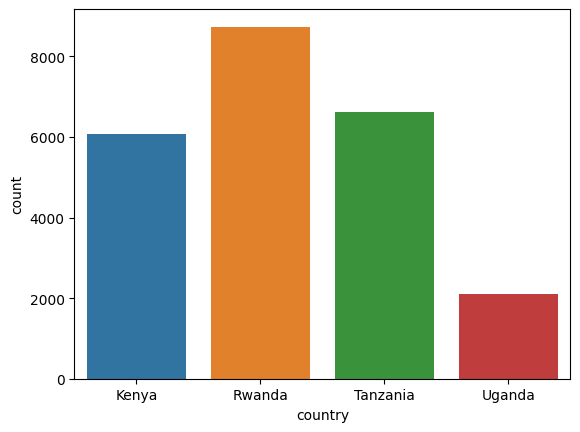

In [17]:
# Explore the country distribution using a countplot for visualization
sns.countplot(train, x ='country')

##### Explore the year column

In [21]:
train['year'].unique()

array([2018, 2016, 2017], dtype=int64)

<Axes: xlabel='year', ylabel='count'>

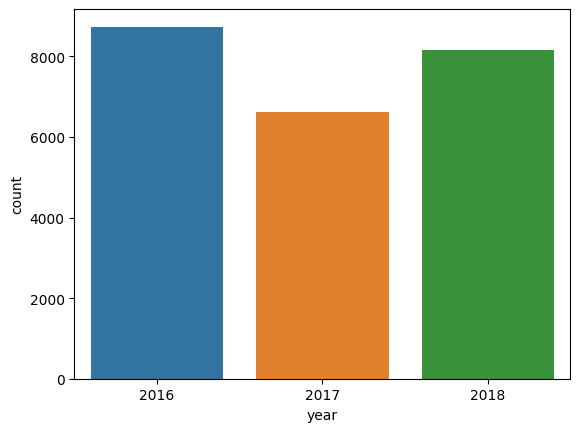

In [23]:
sns.countplot(train, x='year')

##### Explore the location column

In [24]:
train['location_type'].unique()

array(['Rural', 'Urban'], dtype=object)

<Axes: xlabel='location_type', ylabel='count'>

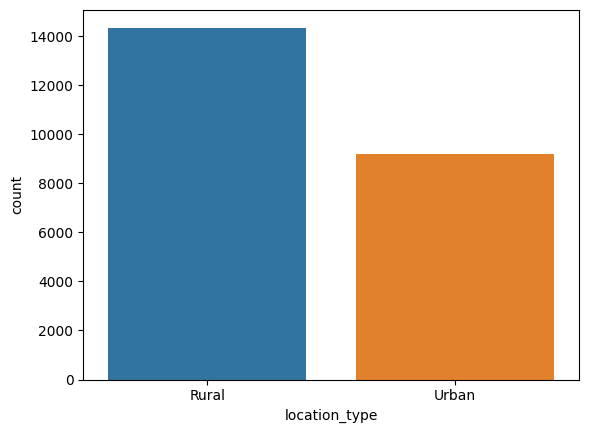

In [25]:
sns.countplot(train, x='location_type')

##### Explore the household size 

In [26]:
train['household_size'].unique()

array([ 3,  5,  8,  7,  1,  6,  4, 10,  2, 11,  9, 12, 16, 15, 13, 14, 21,
       18, 17, 20], dtype=int64)

<Axes: xlabel='household_size', ylabel='count'>

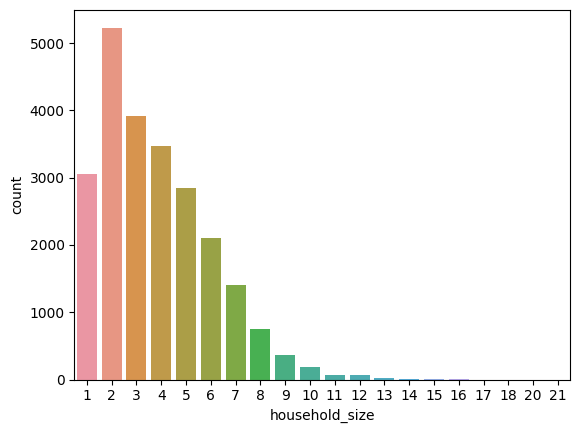

In [28]:
sns.countplot(train, x= 'household_size')

Text(0.5, 1.0, 'Household size distribution plot')

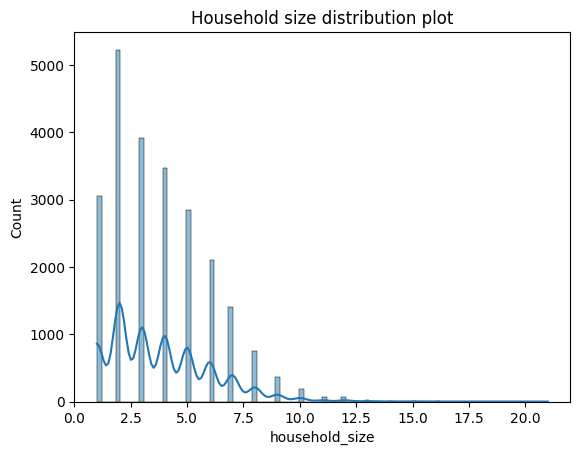

In [30]:
# Alternativel: histogram plot
sns.histplot(data = train, x ='household_size', kde= True)

plt.title('Household size distribution plot')


##### Explore age

In [31]:
train['age_of_respondent'].unique()

array([ 24,  70,  26,  34,  32,  42,  54,  76,  40,  69,  64,  31,  38,
        47,  27,  48,  25,  21,  18,  22,  58,  55,  62,  29,  35,  45,
        67,  19,  80,  66,  50,  33,  28,  51,  16,  17,  30,  37,  59,
        65,  46,  56,  52,  23,  43,  49,  44,  72,  53,  63,  39,  81,
        78,  36,  20,  60,  95,  71,  57,  85,  68,  41,  61,  75,  86,
        73,  93,  74,  88,  90,  77,  84,  82,  89,  79,  83,  94,  87,
        92,  91,  98,  97,  96,  99, 100], dtype=int64)

<Axes: xlabel='age_of_respondent', ylabel='Count'>

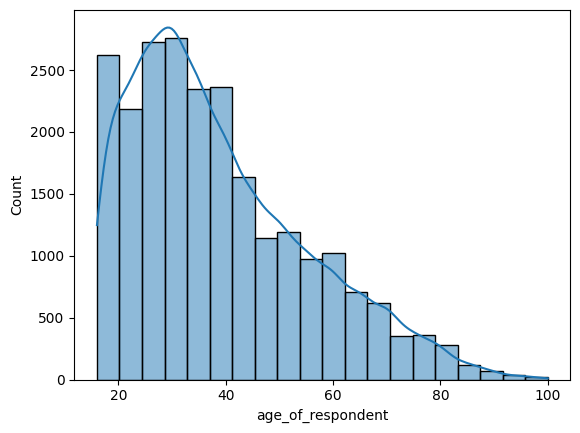

In [36]:
# Age distribution plot
sns.histplot(train, x ='age_of_respondent' ,bins=20, kde=True)